In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
import ast
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
am=pd.read_csv('/content/Amazon mobiles data.csv')
fl=pd.read_csv('/content/flipcart_mobiles.csv')
am=am.drop(['Unnamed: 0'],axis=1)
fl=fl.drop(['Unnamed: 0'],axis=1)
am=pd.DataFrame.drop_duplicates(am)
fl=pd.DataFrame.drop_duplicates(fl)

In [ ]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 959
Columns: 152 entries, In The Box to Tertiary Clock Speed
dtypes: float64(3), object(149)
memory usage: 1011.2+ KB


In [ ]:
print(am.columns.tolist())

['OS', 'RAM', 'Product Dimensions', 'Batteries', 'Item model number', 'Wireless communication technologies', 'Connectivity technologies', 'Special features', 'Display technology', 'Other display features', 'Device interface - primary', 'Other camera features', 'Form factor', 'Colour', 'Battery Power Rating', 'Whats in the box', 'Manufacturer', 'Item Weight', 'ASIN', 'Customer Reviews', 'Best Sellers Rank', 'Date First Available', 'Item Dimensions LxWxH', 'Generic Name', 'Rear Camera Lens 1', 'Rear Camera Lens 2', 'Screen Size', 'Screen Type', 'Battery Power (In mAH)', 'Inbuilt Storage (in GB)', 'Expandable Storage', 'Processor Brand', 'Operating System', 'Warranty Details', 'Battery type', 'Processor Speed', "What's in the box", 'Additional Features', 'Item Dimensions', 'Name', 'Detailed Reviews', 'Price', 'Rating', 'Country of Origin', 'Phone Talk Time', 'Phone Standby Time (with data)', 'Net Quantity', 'Resolution', 'Imported By', 'Packer', 'Importer', 'Audio Jack', 'Included Compone

In [ ]:
am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 560
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OS                                   260 non-null    object
 1   RAM                                  259 non-null    object
 2   Product Dimensions                   258 non-null    object
 3   Batteries                            234 non-null    object
 4   Item model number                    254 non-null    object
 5   Wireless communication technologies  215 non-null    object
 6   Connectivity technologies            251 non-null    object
 7   Special features                     259 non-null    object
 8   Display technology                   163 non-null    object
 9   Other display features               261 non-null    object
 10  Device interface - primary           161 non-null    object
 11  Other camera features                241 non-

In [ ]:
am['Other camera features'].unique()

array(['2MP', '5', '12MP+2MP+2MP', 'Rear, Front', '64MP+8MP+5MP+5MP',
       '48MP+8MP+5MP', '8MP', '13MP+2MP', '48MP+8MP+2MP+2MP', '32MP',
       '64 MP + 12MP + 5MP + 5MP', '48MP', '64MP+12MP+5MP+5MP',
       '64MP+8MP+5MP+2MP', nan, '8MP Rear and 5MP Front Camera',
       '12MP+8MP+2MP+2MP', '13MP', '13MP+5MP+2MP', '13MP+2MP+2MP',
       '13MP+8MP+5MP+2MP', '16MP', '13MP+12MP',
       '16MP Selfie Camera Setup, Sensor Sizes/Pixel Data: 1/3.09, 1.0um, CMOS Sensor, Focusing Mode: FF, 79.3 Degree Wide Angle of Front Camera, f/2.1 Aperture, Lens Number: 5P, EIS Support, Characteristic Function for Photograph: Time-lapse Photography, Front Panorama, Beauty, Front Shot Flip, Super Nightscape, Blurring Adjustable, Slow Motion: 1080P at 120 fps, 64MP + 8MP + 2MP + 2MP Rear Camera Setup, Sensor Sizes/Pixel Data: 1/1.73, 0.8um (64MP, Main) + 1/4, 1.12um (8MP, Wide Angle) + 1/5, 1.75um (2MP, B and W Portrait Lens) + 1/5, 1.75um (2MP, Macro), CMOS Sensor, Focusing Method: PDAF, Aperture: f/1.8 

In [ ]:
am[am['Battery Power (In mAH)']=='22 milliamp hours']

,OS,RAM,Product Dimensions,Batteries,Item model number,Wireless communication technologies,Connectivity technologies,Special features,Display technology,Other display features,Device interface - primary,Other camera features,Form factor,Colour,Battery Power Rating,Whats in the box,Manufacturer,Item Weight,ASIN,Customer Reviews,Best Sellers Rank,Date First Available,Item Dimensions LxWxH,Generic Name,Rear Camera Lens 1,Rear Camera Lens 2,Screen Size,Screen Type,Battery Power (In mAH),Inbuilt Storage (in GB),Expandable Storage,Processor Brand,Operating System,Warranty Details,Battery type,Processor Speed,What's in the box,Additional Features,Item Dimensions,Name,Detailed Reviews,Price,Rating,Country of Origin,Phone Talk Time,Phone Standby Time (with data),Net Quantity,Resolution,Imported By,Packer,Importer,Audio Jack,Included Components,GPS,Package Dimensions
36,Android,6 GB,16.23 x 7.54 x 0.94 cm; 196.5 Grams,1 A batteries required. (included),RMX2151,NaN,4G,"6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...",LCD,Wireless,Touchscreen,"16MP Selfie Camera Setup, Sensor Sizes/Pixel D...",NaN,Mist Blue,22 milliamp_hours,"Handset, Adapter, Type C Cable, SIM Card Tool,...","OPPO Mobiles India Pvt Ltd, OPPO Mobiles India...",196.5 grammes,B08HLQZM5D,3.9 out of 5 stars\n\n\n\n\n\n\n\n\n118 rating...,#304 in Electronics (See Top 100 in Electronic...,7 September 2020,16.2 x 7.5 x 0.9 Centimeters,Smart Phone,8 megapixels,"64MP + 8MP + 2MP + 2MP Rear Camera Setup, Sens...",16.51 cm,LCD,22 milliamp hours,64 GB,64 GB,NaN,Android,Brand Warranty of 1 Year Available for Mobile ...,Lithium Polymer,2 GHz,"Handset, Adapter, Type C Cable, SIM Card Tool,...",6 GB RAM | 64 GB ROM | Expandable Upto 256 GB;...,16.23 x 7.54 x 0.94 cm,"Realme 7 (Mist Blue, 64 GB) (6 GB RAM)","[""Heat issue don't buy...4g video calling qual...","16,999.00",3.9,India,NaN,12 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Android,3 GB,16.45 x 7.59 x 0.98 cm; 209 Grams,1 Lithium Polymer batteries required. (included),RMX2189,NaN,4G,"3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...",NaN,Wireless,NaN,13MP (Rear Main) + 2MP (Mono) + 2MP (Macro) Re...,Smartphone,POWER BLUE,22 milliamp_hours,"Handset, Adapter, USB Cable, SIM Card Tool, Sc...","OPPO Mobiles India Pvt Ltd, OPPO Mobiles India...",209 grammes,B08GKHY681,4.0 out of 5 stars\n\n\n\n\n\n\n\n\n77 ratings...,"#1,848 in Electronics (See Top 100 in Electron...",23 August 2020,16.4 x 7.6 x 1 Centimeters,Smart Phone,13 megapixels,13MP (Rear Main) + 2MP (Mono) + 2MP (Macro) Re...,16.56 cm,LCD,22 milliamp hours,32 GB,32 GB,NaN,Android,Brand Warranty of 1 Year Available for Mobile ...,Lithium Polymer,2.3 GHz,"Handset, Adapter, USB Cable, SIM Card Tool, Sc...",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB;...,16.45 x 7.59 x 0.98 cm,"Realme C12 (Power Blue, 32 GB) (3 GB RAM)",['Best mobile but price is higher than flipcar...,"10,999.00",4.0,India,NaN,12 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Android,6 GB,16.23 x 7.54 x 0.94 cm; 196.5 Grams,1 A batteries required. (included),RMX2151,NaN,4G,"6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...",LCD,Wireless,Touchscreen,"16MP Selfie Camera Setup, Sensor Sizes/Pixel D...",NaN,Mist White,22 milliamp_hours,"Handset, Adapter, Type C Cable, SIM Card Tool,...","OPPO Mobiles India Pvt Ltd, OPPO Mobiles India...",196.5 grammes,B08HWKSP5B,3.9 out of 5 stars\n\n\n\n\n\n\n\n\n32 ratings...,#756 in Electronics (See Top 100 in Electronic...,7 September 2020,16.2 x 7.5 x 0.9 Centimeters,Smart Phone,8 megapixels,"64MP + 8MP + 2MP + 2MP Rear Camera Setup, Sens...",16.51 cm,LCD,22 milliamp hours,64 GB,64 GB,NaN,Android,Brand Warranty of 1 Year Available for Mobile ...,Lithium Polymer,2 GHz,"Handset, Adapter, Type C Cable, SIM Card Tool,...",6 GB RAM | 64 GB ROM | Expandable Upto 256 GB;...,16.23 x 7.54 x 0.94 cm,"Realme 7 (Mist White, 64 GB) (6 GB RAM)",['Device Body is little bit bigger than other ...,"17,990.00",3.9,India,NaN,12 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,Android,3 GB,11 x 12 x 

In [ ]:
am['Battery Power (In mAH)'].unique()

array(['5000', '4230', '4000 milliamp hours', '6000', '3000', '4000',
       '5020', '4115', '7000', nan, '3020', '3100', '4030',
       '5000 milliamp hours', '22 milliamp hours', '1800',
       '1000 milliamp hours', '4015 milliamp hours',
       '3000 milliamp hours', '4500', '1960', '4500 milliamp hours',
       '1800 milliamp hours', '2400', '400', '3950',
       '6000 milliamp hours', '800', '2500 milliamp hours',
       '3040 milliamp hours', '2800 milliamp hours', '300',
       '24 milliamp hours', '4050', '1.56', '5200 milliamp hours',
       '2200 milliamp hours', '2400 milliamp hours', '4200', '4100',
       '800 milliampere_hour', '4015'], dtype=object)

In [ ]:
#sorted(am.columns)

In [ ]:
#for i in sorted(fl.columns):
  #print(i)

**Convertions and cleaning in seperate datasets -Data modification**

In [ ]:
def storage_convert(a):
  try:
    l=a.split(' ')
    if l[-1]=='MB':
      return float(l[0])*0.001
    if l[-1]=='KB':
      return float(l[0])*0.000001
    if l[-1]=='TB':
      return float(l[0])*1000
    return float(l[0])
    if 'MB' in a:
      return float(a.replace('MB',''))*0.001
  except Exception as e:
    return a

def add(a):
  try:
    if len(a)>1:
      a='+'+a
    return a
  except Exception as e:
    return a

def weight_convert(a):
  try:
    l=a.split(' ')
    if l[1]=='kg':
      return float(l[0])*1000
    return float(l[0])
  except Exception as e:
    return a

def battery_convert(a):
  try:
    return float(a.split(' ')[0])
  except Exception as e:
    return a
    

def reviews(a):
  try:
    q=a.strip('][').split(', ')
    return q
  except Exception as e:
    return a



fl['Internal Storage']=fl['Internal Storage'].apply(weight_convert)
am['Inbuilt Storage (in GB)']=am['Inbuilt Storage (in GB)'].apply(weight_convert)

fl['Expandable Storage']=fl['Expandable Storage'].apply(storage_convert)
am['Expandable Storage']=am['Expandable Storage'].apply(storage_convert)


fl['Secondary Camera']=fl['Secondary Camera'].apply(add)
fl['Camera']=fl['Primary Camera']+fl['Secondary Camera']

am['Item Weight']=am['Item Weight'].apply(weight_convert)
fl['Weight']=fl['Weight'].apply(weight_convert)

fl['Battery Capacity']=fl['Battery Capacity'].apply(battery_convert)
am['Battery Power (In mAH)']=am['Battery Power (In mAH)'].apply(battery_convert)

fl['reviews']=fl['reviews'].apply(reviews)



In [ ]:
#'Audio Jack','RAM', 

**Renaming columns of flipkart to match with Amazon's. Matching column names**

In [ ]:
fl.rename(columns={'In The Box':'Whats in the box',
'Model Number':'Item model number',
'Color':'Colour',
'Other Display Features':'Other display features',
'price':'Price',
'stars':'Rating',
'reviews':'Detailed Reviews',
'Camera':'Other camera features',
'Model Name':'Name',
'Display Type':'Display technology',
'GPS Type':'GPS',
'Internal Storage':'Inbuilt Storage (in GB)',
'Weight':'Item Weight',
'Processor Type':'Processor Brand',
'Battery Capacity':'Battery Power (In mAH)',
'Warranty Summary':'Warranty Details',
},inplace=True)

In [ ]:
fl.columns = fl.columns.map(str.capitalize) 


In [ ]:
am.columns = am.columns.map(str.capitalize) 

In [ ]:
d=[]
for i in fl.columns:
  if i in am.columns:
    d.append(i)
print(d)
print(len(d))

['Whats in the box', 'Item model number', 'Name', 'Colour', 'Resolution', 'Display technology', 'Other display features', 'Operating system', 'Processor brand', 'Inbuilt storage (in gb)', 'Ram', 'Expandable storage', 'Audio jack', 'Gps', 'Battery power (in mah)', 'Item weight', 'Warranty details', 'Price', 'Rating', 'Detailed reviews', 'Battery type', 'Other camera features']
22


In [ ]:
am_new=am[d]
am_new['OEM']='Amazon'
fl_new=fl[d]
fl_new['OEM']='Flipkart'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
am_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 560
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Whats in the box         255 non-null    object 
 1   Item model number        254 non-null    object 
 2   Name                     264 non-null    object 
 3   Colour                   260 non-null    object 
 4   Resolution               64 non-null     object 
 5   Display technology       163 non-null    object 
 6   Other display features   261 non-null    object 
 7   Operating system         216 non-null    object 
 8   Processor brand          134 non-null    object 
 9   Inbuilt storage (in gb)  207 non-null    object 
 10  Ram                      259 non-null    object 
 11  Expandable storage       215 non-null    float64
 12  Audio jack               91 non-null     object 
 13  Gps                      38 non-null     object 
 14  Battery power (in mah)   2

In [ ]:
fl_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 959
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Whats in the box         839 non-null    object 
 1   Item model number        838 non-null    object 
 2   Name                     840 non-null    object 
 3   Colour                   840 non-null    object 
 4   Resolution               839 non-null    object 
 5   Display technology       494 non-null    object 
 6   Other display features   389 non-null    object 
 7   Operating system         571 non-null    object 
 8   Processor brand          501 non-null    object 
 9   Inbuilt storage (in gb)  826 non-null    object 
 10  Ram                      785 non-null    object 
 11  Expandable storage       527 non-null    float64
 12  Audio jack               418 non-null    object 
 13  Gps                      292 non-null    object 
 14  Battery power (in mah)   8

**Merging both the datasets**

In [ ]:
df=pd.DataFrame()
df=df.append(am_new,True)
df=df.append(fl_new,True)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Whats in the box         1094 non-null   object 
 1   Item model number        1092 non-null   object 
 2   Name                     1104 non-null   object 
 3   Colour                   1100 non-null   object 
 4   Resolution               903 non-null    object 
 5   Display technology       657 non-null    object 
 6   Other display features   650 non-null    object 
 7   Operating system         787 non-null    object 
 8   Processor brand          635 non-null    object 
 9   Inbuilt storage (in gb)  1033 non-null   object 
 10  Ram                      1044 non-null   object 
 11  Expandable storage       742 non-null    float64
 12  Audio jack               509 non-null    object 
 13  Gps                      330 non-null    object 
 14  Battery power (in mah)  

**Data cleaning on the merged dataset for many columns like audio jack, memory, RAM,etc**

In [ ]:
def audio_jack(a):
  try:
    a=a.lower()
    if 'mm' in a:
      return a.replace('mm','').strip()
    if 'usb' in a:
      return a.replace('usb','').strip()
    return a
  except Exception as e:
    return a
  

In [ ]:
df['Audio jack'].unique()

array([nan, '3.5 mm', 'Yes', '3.5mm', '3.5 MM', '3.5', 'Type C', '3.5MM',
       '0.3', 'USB Type C', 'yes', 'No'], dtype=object)

In [ ]:
df['Audio jack']=df['Audio jack'].apply(audio_jack)

In [ ]:
def clean_fur(a):
  try:
    if 'MB' in a:
      return float(a.replace('MB',''))*0.001
    return float(a)
  except Exception as e:
    return a

In [ ]:
df['Inbuilt storage']=df['Inbuilt storage (in gb)'].apply(clean_fur)

In [ ]:
df=df.drop(['Inbuilt storage (in gb)'],axis=1)

In [ ]:
df['RAM']=df['Ram'].apply(storage_convert)
df=df.drop(['Ram'],axis=1)

In [ ]:
def resolution(a):
  try:
    a=a.replace('pixel','')
    a=a.replace('pixels','')
    a=a.replace('Pixel','')
    a=a.replace('Pixels','')
    a=a.replace(' ','')
    a=a.replace('s','')
    a=a.replace('$','')
    a=a.strip()
    if 'Q' in a or 'p' in a:
      return np.nan
    return a
  except Exception as e:
    return a

In [ ]:
df['Resolution']=df['Resolution'].apply(resolution)

In [ ]:
def price_clean(a):
  try:
    a=a.replace(',','')
    a=a.replace('₹','')
    return float(a)
  except Exception as e:
    return a

In [ ]:
df['Price']=df['Price'].apply(price_clean)

In [ ]:
def rating_clean(a):
  try:
    return float(a)
  except Exception as e:
    return np.nan


In [ ]:
df['Rating']=df['Rating'].apply(rating_clean)

In [ ]:
def battery_clean(a):
  try:
    a= a.upper().strip()
    #a=a.replace('LI_','LITHIUM ')
    #a=a.replace('LI-','LITHIUM ')
    if 'ON' in a:
      return 'Lithium Ion'
    if 'PO' in a:
      return 'Lithium Polymer'
    if 'REM' in a:
      return 'Removable battery'
    return a
  except Exception as e:
    return a

In [ ]:
print(df['Battery type'].unique().tolist())

['Lithium Ion', 'Lithium Polymer', nan, 'Lithium', 'REMOVABLE', 'Li-Ion', 'Li-on', 'Li-ion', 'lithium-ion', 'li-Ion', 'Lion', 'Lithium Polyme', 'LI POLY', 'Li-Po', '\xa0lithium-ion', 'lithium-polymer', 'Li-polymer', 'Li-Ion, 1800 mAh', 'li-ion', 'Lithium ion batteries', 'remove able', '\xa0lithium polymer', 'Li_ion', 'LITHIUM-ION', 'Li-Polymer', 'lion battery', 'Li-Poly', 'LI POLI', 'LI-ION', 'lion', 'Li.Ion', 'Li Polymer', '5C']


In [ ]:
df['Battery type']=df['Battery type'].apply(battery_clean)

**Perform senitment analysis on reviews and using it ahead for analysis and removing the reviews column**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob
def getSentiment(data):
  try:
    data=" ".join(data)
    if isinstance(data,str):
        blob =TextBlob(str(data))
        senti = [sentence.sentiment.polarity for sentence in blob.sentences]
        avg_sentiment = sum(senti)/len(senti) 
        return avg_sentiment
    else:
        return 0
  except Exception as e:
    return 0

In [ ]:

df['sentiments'] = df['Detailed reviews'].apply(getSentiment)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Whats in the box        1094 non-null   object 
 1   Item model number       1092 non-null   object 
 2   Name                    1104 non-null   object 
 3   Colour                  1100 non-null   object 
 4   Resolution              898 non-null    object 
 5   Display technology      657 non-null    object 
 6   Other display features  650 non-null    object 
 7   Operating system        787 non-null    object 
 8   Processor brand         635 non-null    object 
 9   Expandable storage      742 non-null    float64
 10  Audio jack              509 non-null    object 
 11  Gps                     330 non-null    object 
 12  Battery power (in mah)  1012 non-null   float64
 13  Item weight             833 non-null    float64
 14  Warranty details        1044 non-null   

In [ ]:
df=df.drop(['Detailed reviews'],axis=1)

In [ ]:
df=df.rename(columns={'Expandable storage':'Expandable storage (in GB)',
                      'Item weight':'Item weight (in gms)',
                      'Price':'Price (₹)',
                      'Inbuilt storage':'Inbuilt storage (in GB)',
                      'RAM':'RAM (in GB)'})

**Handling missing values**

In [ ]:
df.columns

Index(['Whats in the box', 'Item model number', 'Name', 'Colour', 'Resolution',
       'Display technology', 'Other display features', 'Operating system',
       'Processor brand', 'Expandable storage (in GB)', 'Audio jack', 'Gps',
       'Battery power (in mah)', 'Item weight (in gms)', 'Warranty details',
       'Price (₹)', 'Rating', 'Battery type', 'Other camera features', 'OEM',
       'Inbuilt storage (in GB)', 'RAM (in GB)', 'sentiments'],
      dtype='object')

In [ ]:
df.dropna(subset=['Price (₹)'],axis=0,inplace=True)

In [ ]:
for i in df.columns:
  if df[i].dtypes=='float64':
    avg=df[i].mean()
    df[i].replace(np.nan,avg,inplace=True)

In [ ]:
m=[]
for i in df.columns:
  if df[i].dtypes=='object':
    m.append(i)
print(", ".join(m))

Whats in the box, Item model number, Name, Colour, Resolution, Display technology, Other display features, Operating system, Processor brand, Audio jack, Gps, Warranty details, Battery type, Other camera features, OEM


In [ ]:
for i in df.columns:
  if df[i].dtypes=='object':
    val=df[i].value_counts().idxmax()
    df[i].replace(np.nan,val,inplace=True)

In [ ]:
df['Processor brand'].unique().tolist().sort()

In [ ]:
def oss(a):
  try:
    if len(a)<3 or a=='0.1' or a=='8.1' or a=='4.1.1' or a=='1.1' or a=='3.7V':
      return 'No'
    else:
      return a
    return a
  except Exception as e:
    return a
      
dl=df.copy()
dl['Operating system']=dl['Operating system'].apply(oss)
dl['Operating system'].unique().tolist()

['Android',
 'Android 9.0',
 'Android 10',
 'Stock Android 10 Go',
 'Android 9.0; Go Edition',
 'Stock Android 10',
 'Android 8.1',
 'Android 10.0',
 'Symbian',
 'Nougat 7.0',
 'iOS 12',
 'Android 6.0',
 'Funtouch OS 11 (Based on Android 11)',
 'Symbian 9.1',
 'Symbian 9.3',
 'Android; Android 10.0',
 'Android; Android',
 'Android 7.0',
 'IOS',
 'Android 10.0; Go Edition',
 'Android 8.0',
 'No',
 'Windows',
 'Android 11',
 'Android Nougat 7',
 'iOS 14.2',
 'Android Pie 9.0',
 'Android Pie 9',
 'Android Pie 10',
 'Android 10 (Go Edition)',
 'Android Android Q 10',
 'Series 30+',
 'Android Android Q 11',
 'Android Oreo 8.1',
 'Symbian 1',
 'Belle',
 'iOS 13',
 'Android 10 Go Edition',
 'Android Android Q Oxygen OS V10',
 'Android Android Q Android 9',
 'iOS 14',
 'Android Pie 9.0 (Go Edition)',
 'Android Android V10',
 'Android Android Q V10',
 'Android Nougat 7.0',
 'Series 30',
 'MOCOR_16A_MP_W17.43.4',
 'Android Oreo Andriod 10(Go Edition)',
 'Android Marshmallow 6.0',
 'Version 06',


In [ ]:
df['Other camera features'].unique().tolist()

['2MP',
 '5',
 '12MP+2MP+2MP',
 'Rear, Front',
 '64MP+8MP+5MP+5MP',
 '48MP+8MP+5MP',
 '8MP',
 '13MP+2MP',
 '48MP+8MP+2MP+2MP',
 '32MP',
 '64 MP + 12MP + 5MP + 5MP',
 '48MP',
 '64MP+12MP+5MP+5MP',
 '64MP+8MP+5MP+2MP',
 '64MP + 12MP + 5MP + 5MP+32MP Front Camera',
 '8MP Rear and 5MP Front Camera',
 '12MP+8MP+2MP+2MP',
 '13MP',
 '13MP+5MP+2MP',
 '13MP+2MP+2MP',
 '13MP+8MP+5MP+2MP',
 '16MP',
 '13MP+12MP',
 '16MP Selfie Camera Setup, Sensor Sizes/Pixel Data: 1/3.09, 1.0um, CMOS Sensor, Focusing Mode: FF, 79.3 Degree Wide Angle of Front Camera, f/2.1 Aperture, Lens Number: 5P, EIS Support, Characteristic Function for Photograph: Time-lapse Photography, Front Panorama, Beauty, Front Shot Flip, Super Nightscape, Blurring Adjustable, Slow Motion: 1080P at 120 fps, 64MP + 8MP + 2MP + 2MP Rear Camera Setup, Sensor Sizes/Pixel Data: 1/1.73, 0.8um (64MP, Main) + 1/4, 1.12um (8MP, Wide Angle) + 1/5, 1.75um (2MP, B and W Portrait Lens) + 1/5, 1.75um (2MP, Macro), CMOS Sensor, Focusing Method: PDAF, A

In [ ]:
dl=df.copy()
dl.sort_values(['Battery power (in mah)'])[['Battery power (in mah)','Name','OEM']][:30]

,Battery power (in mah),Name,OEM
189,1.56,5S 16GB Silver by Original I P H O N E with 1 ...,Amazon
244,22.00,"Motorola E7 Plus (Misty Blue, 64 GB) (4 GB RAM)",Amazon
202,22.00,"Realme C11 (Rich Green, 32 GB) (2 GB RAM)",Amazon
183,22.00,"Itel Vision1 (Gradation Green, 32 GB) (3 GB RAM)",Amazon
120,22.00,"Realme 7 (Mist White, 64 GB) (6 GB RAM)",Amazon
218,22.00,"Motorola G9 (Sapphire Blue, 64 GB) (4 GB RAM)",Amazon
222,22.00,"Realme 7 Pro (Mirror Blue, 128 GB) (6 GB RAM)",Amazon
34,22.00,"Realme 7 (Mist Blue, 64 GB) (6 GB RAM)",Amazon
71,22.00,"Realme C12 (Power Blue, 32 GB) (3 GB RAM)",Amazon
175,24.00,Infinix Smart HD 2021 (Quartz Green 32 GB/2 GB...,Amazon


In [ ]:
list(df['Battery power (in mah)']).sort()

**LabelEncoding categorical columns**

In [ ]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(i)

Whats in the box
Item model number
Name
Colour
Resolution
Display technology
Other display features
Operating system
Processor brand
Audio jack
Gps
Warranty details
Battery type
Other camera features
OEM


In [ ]:
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()
label5=LabelEncoder()
label6=LabelEncoder()
label7=LabelEncoder()
label8=LabelEncoder()
label9=LabelEncoder()
label10=LabelEncoder()
label11=LabelEncoder()
label12=LabelEncoder()
label13=LabelEncoder()
label14=LabelEncoder()


In [ ]:
labels={'Whats in the box':label1,
'Item model number':label2,
'Name':label3,
'Colour':label4,
'Resolution':label5,
'Display technology':label6,
'Other display features':label7,
'Operating system':label8,
'Processor brand':label9,
'Audio jack':label10,
'Gps':label11,
'Warranty details':label11,
'Battery type':label12,
'Other camera features':label13,
'OEM':label14}

In [ ]:
for i,k in labels.items():
  df[i]=k.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1109
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Whats in the box            1109 non-null   int64  
 1   Item model number           1109 non-null   int64  
 2   Name                        1109 non-null   int64  
 3   Colour                      1109 non-null   int64  
 4   Resolution                  1109 non-null   int64  
 5   Display technology          1109 non-null   int64  
 6   Other display features      1109 non-null   int64  
 7   Operating system            1109 non-null   int64  
 8   Processor brand             1109 non-null   int64  
 9   Expandable storage (in GB)  1109 non-null   float64
 10  Audio jack                  1109 non-null   int64  
 11  Gps                         1109 non-null   int64  
 12  Battery power (in mah)      1109 non-null   float64
 13  Item weight (in gms)        1109 

In [ ]:
df

,Whats in the box,Item model number,Name,Colour,Resolution,Display technology,Other display features,Operating system,Processor brand,Expandable storage (in GB),Audio jack,Gps,Battery power (in mah),Item weight (in gms),Warranty details,Price (₹),Rating,Battery type,Other camera features,OEM,Inbuilt storage (in GB),RAM (in GB),sentiments
0,372,429,406,280,37,60,135,10,69,64.000000,1,0,5000.0,194.000000,66,10999.0,4.0,2,76,0,64.0,4.000,0.003012
1,246,432,417,216,37,60,135,10,68,32.000000,1,0,5000.0,194.000000,66,8499.0,4.1,3,120,0,32.0,2.000,0.013736
2,287,57,370,154,37,71,135,10,73,128.000000,1,0,4230.0,180.000000,66,15990.0,4.0,3,21,0,128.0,6.000,0.000000
3,39,80,377,22,17,71,135,10,66,16.000000,1,0,4000.0,168.000000,61,10999.0,2.8,2,178,0,16.0,2.000,-0.002396
4,69,515,466,284,34,87,135,10,18,128.000000,1,0,6000.0,191.000000,66,19999.0,4.2,2,157,0,128.0,6.000,0.005680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,370,587,474,275,70,67,84,35,33,128.000000,1,34,3050.0,186.486767,124,7499.0,4.0,2,52,1,32.0,3.000,0.340227
1106,144,35,57,139,14,71,133,11,92,32.000000,1,0,1000.0,0.200000,0,649.0,3.0,2,132,1,64.0,0.064,0.000000
1107,170,214,522,139,75,71,135,48,92,282.686739,1,0,2700.0,186.486767,8,944.0,3.8,2,132,1,32.0,0.032,0.000000
1108,261,525,134,14,34,84,135,11,20,1000.000000,1,0,4500.0,199.000000,124,36999.0,4.4,2,8,1,128.0,8.000,0.293705


In [ ]:
df.columns

Index(['Whats in the box', 'Item model number', 'Name', 'Colour', 'Resolution',
       'Display technology', 'Other display features', 'Operating system',
       'Processor brand', 'Expandable storage (in GB)', 'Audio jack', 'Gps',
       'Battery power (in mah)', 'Item weight (in gms)', 'Warranty details',
       'Price (₹)', 'Rating', 'Battery type', 'Other camera features', 'OEM',
       'Inbuilt storage (in GB)', 'RAM (in GB)', 'sentiments'],
      dtype='object')

In [ ]:
df=df[['Whats in the box', 'Item model number', 'Name', 'Colour', 'Resolution',
       'Display technology', 'Other display features', 'Operating system',
       'Processor brand', 'Expandable storage (in GB)', 'Audio jack', 'Gps',
       'Battery power (in mah)', 'Item weight (in gms)', 'Warranty details',
       'Rating', 'Battery type', 'Other camera features', 'OEM',
       'Inbuilt storage (in GB)', 'RAM (in GB)', 'sentiments','Price (₹)']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1109
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Whats in the box            1109 non-null   int64  
 1   Item model number           1109 non-null   int64  
 2   Name                        1109 non-null   int64  
 3   Colour                      1109 non-null   int64  
 4   Resolution                  1109 non-null   int64  
 5   Display technology          1109 non-null   int64  
 6   Other display features      1109 non-null   int64  
 7   Operating system            1109 non-null   int64  
 8   Processor brand             1109 non-null   int64  
 9   Expandable storage (in GB)  1109 non-null   float64
 10  Audio jack                  1109 non-null   int64  
 11  Gps                         1109 non-null   int64  
 12  Battery power (in mah)      1109 non-null   float64
 13  Item weight (in gms)        1109 

In [ ]:
#for i in df.columns:
  #df[i]=df[i]/df[i].max()

In [ ]:
df.to_csv('Preprocessed_data.csv')

**Exploratory data analysis**

In [ ]:
dfcorr=df.corr()
dfcorr["Price (₹)"]

Whats in the box              0.211745
Item model number             0.125815
Name                          0.191381
Colour                        0.112988
Resolution                    0.040852
Display technology           -0.145031
Other display features       -0.119541
Operating system              0.386173
Processor brand              -0.357712
Expandable storage (in GB)    0.260030
Audio jack                    0.030603
Gps                           0.228008
Battery power (in mah)        0.399253
Item weight (in gms)          0.131485
Warranty details              0.254551
Rating                        0.303924
Battery type                  0.010458
Other camera features        -0.330495
OEM                          -0.054885
Inbuilt storage (in GB)       0.528230
RAM (in GB)                   0.180089
sentiments                    0.043075
Price (₹)                     1.000000
Name: Price (₹), dtype: float64

In [ ]:
dfcorr.style.background_gradient()

,Whats in the box,Item model number,Name,Colour,Resolution,Display technology,Other display features,Operating system,Processor brand,Expandable storage (in GB),Audio jack,Gps,Battery power (in mah),Item weight (in gms),Warranty details,Rating,Battery type,Other camera features,OEM,Inbuilt storage (in GB),RAM (in GB),sentiments,Price (₹)
Whats in the box,1.000000,-0.060177,0.115240,0.000404,-0.029974,-0.017235,0.123205,0.234137,-0.115975,0.106459,-0.070234,0.074385,0.096260,0.077022,0.015066,0.010772,0.103074,-0.092091,-0.095693,0.110177,0.034333,-0.057858,0.211745
Item model number,-0.060177,1.000000,0.434873,0.027189,0.065937,-0.099896,0.055060,-0.013739,-0.103402,0.201246,0.030349,0.016642,0.264049,0.065594,-0.020240,0.192784,-0.039404,-0.032919,0.044619,0.157598,0.055129,0.125358,0.125815
Name,0.115240,0.434873,1.000000,-0.090001,0.092715,0.048158,0.103216,0.195082,-0.047312,-0.142847,0.043381,0.209348,0.028322,0.022934,0.077730,0.076785,0.134980,-0.089967,-0.172580,0.043465,-0.021323,-0.009807,0.191381
Colour,0.000404,0.027189,-0.090001,1.000000,0.023490,-0.091732,-0.135044,0.033857,-0.058032,0.130808,-0.004158,0.064787,0.158069,0.047922,0.080143,0.126098,0.011371,-0.153407,0.046336,0.080572,0.044854,0.090091,0.112988
Resolution,-0.029974,0.065937,0.092715,0.023490,1.000000,0.081706,0.230204,0.046481,0.011885,-0.029137,0.105052,0.047852,0.001540,0.126788,0.025640,0.028080,-0.024241,0.066324,-0.055750,-0.017283,-0.000299,-0.046935,0.040852
Display technology,-0.017235,-0.099896,0.048158,-0.091732,0.081706,1.000000,0.489507,0.061805,0.072093,-0.455329,-0.058737,-0.175338,-0.466427,-0.135876,0.017647,-0.244663,-0.024420,0.127802,-0.198214,-0.201701,-0.145633,-0.170970,-0.145031
Other display features,0.123205,0.055060,0.103216,-0.135044,0.230204,0.489507,1.000000,-0.066394,0.058764,-0.188889,-0.016670,-0.177670,-0.260937,-0.007863,-0.076744,-0.204739,0.154208,0.407734,-0.331925,-0.052833,-0.025774,-0.275166,-0.119541
Operating system,0.234137,-0.013739,0.195082,0.033857,0.046481,0.061805,-0.066394,1.000000,-0.258843,0.008319,-0.032444,0.152627,0.037892,-0.077737,0.203225,0.174332,0.013051,-0.251442,0.047733,0.125210,-0.008308,0.076469,0.386173
Processor brand,-0.115975,-0.103402,-0.047312,-0.058032,0.011885,0.072093,0.058764,-0.258843,1.000000,-0.257576,0.038440,-0.171951,-0.299323,0.030015,-0.168577,-0.231989,0.031538,0.280920,-0.070257,-0.136364,-0.020177,-0.128748,-0.357712
Expandable storage (in GB),0.106459,0.201246,-0.142847,0.130808,-0.029137,-0.455329,-0.188889,0.008319,-0.257576,1.000000,-0.060718,0.044022,0.472742,0.071219,-0.106138,0.297705,-0.137450,-0.109965,0.368506,0.302308,0.095227,0.253066,0.260030


In [ ]:
from scipy import stats

In [ ]:
d=[]
for i in df.columns:
  if i=='Price (₹)':
    continue
  pearson_coef,p_value=stats.pearsonr(df[i],df['Price (₹)'])
  d.append({'Column Name':i,'Pearson_coef':pearson_coef,'P-Value':p_value})

In [ ]:
chart=pd.DataFrame(d)

In [ ]:
chart

,Column Name,Pearson_coef,P-Value
0,Whats in the box,0.211745,1.045165e-12
1,Item model number,0.125815,2.647780e-05
2,Name,0.191381,1.313507e-10
3,Colour,0.112988,1.628986e-04
4,Resolution,0.040852,1.739991e-01
5,Display technology,-0.145031,1.234677e-06
6,Other display features,-0.119541,6.587003e-05
7,Operating system,0.386173,9.335745e-41
8,Processor brand,-0.357712,8.146991e-35
9,Expandable storage (in GB),0.260030,1.349879e-18


In [ ]:
chart.to_excel('chart.xlsx')

In [ ]:
def absolute(a):
  return abs(a)
chart['Pearson_coef']=chart['Pearson_coef'].apply(absolute)

In [ ]:
p_val=chart[chart['P-Value']<0.001]

In [ ]:
most_corr=p_val[p_val['Pearson_coef']>0.3]
most_corr

,Column Name,Pearson_coef,P-Value
7,Operating system,0.386173,9.335745e-41
8,Processor brand,0.357712,8.146991e-35
12,Battery power (in mah),0.399253,1.085833e-43
15,Rating,0.303924,3.943504e-25
17,Other camera features,0.330495,1.131336e-29
19,Inbuilt storage (in GB),0.528230,1.033186e-80


In [ ]:
most_corr.to_excel('best_features.xlsx')

In [ ]:
col_name=most_corr['Column Name'].unique()

In [ ]:
#col_name=['Operating system','Battery power (in mah)','Rating','Inbuilt storage (in GB)']

In [ ]:
for i in col_name:
 print(df.columns.get_loc(i))

7
8
12
15
19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1109
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Whats in the box            1109 non-null   int64  
 1   Item model number           1109 non-null   int64  
 2   Name                        1109 non-null   int64  
 3   Colour                      1109 non-null   int64  
 4   Resolution                  1109 non-null   int64  
 5   Display technology          1109 non-null   int64  
 6   Other display features      1109 non-null   int64  
 7   Operating system            1109 non-null   int64  
 8   Processor brand             1109 non-null   int64  
 9   Expandable storage (in GB)  1109 non-null   float64
 10  Audio jack                  1109 non-null   int64  
 11  Gps                         1109 non-null   int64  
 12  Battery power (in mah)      1109 non-null   float64
 13  Item weight (in gms)        1109 

In [ ]:
X=df.iloc[:,[7,8,12,15,17,19]]
y=df.iloc[:,-1]

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [ ]:
scaler.

array([1.95834249e+02, 9.56469655e+02, 3.31353144e+06, 2.06707054e-01,
       1.78065517e+03, 3.46777020e+03])

In [ ]:
print(X.shape, x.shape)

(1109, 6) (1109, 6)


In [ ]:
y

0       10999.0
1        8499.0
2       15990.0
3       10999.0
4       19999.0
         ...   
1105     7499.0
1106      649.0
1107      944.0
1108    36999.0
1109    23999.0
Name: Price (₹), Length: 1109, dtype: float64

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

#Linear Regression

In [ ]:
linreg=LinearRegression()
linreg.fit(Xtrain,Ytrain)
linreg.score(Xtest,Ytest)*100

43.07050181861902

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


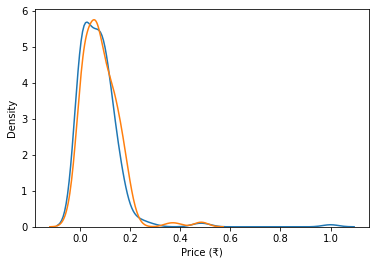

In [ ]:
yhat=linreg.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

#Decision Tree

In [ ]:
dectree=DecisionTreeRegressor(max_depth=50)
dectree.fit(Xtrain,Ytrain)
dectree.score(Xtest,Ytest)*100

44.13413058224324

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


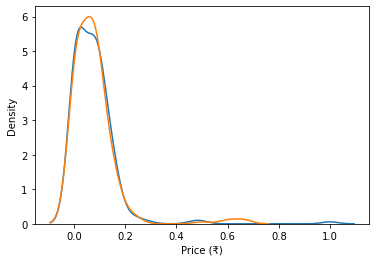

In [ ]:
yhat=dectree.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

#Random Forest


In [ ]:
ranfor=RandomForestRegressor(n_estimators=300)
ranfor.fit(Xtrain,Ytrain)
ranfor.score(Xtest,Ytest)*100

87.45576533552068

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


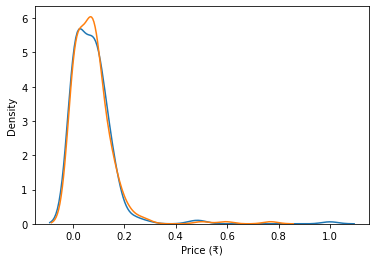

In [ ]:
yhat=ranfor.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

#testing

In [ ]:
import operator

In [ ]:
lar={}
for i in range(0,50):
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
  reg=LinearRegression()
  reg.fit(Xtrain,Ytrain)
  sc=reg.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:

sorted(lar.items(),key=operator.itemgetter(1),reverse=True)

[(45, 57.88170243238925),
 (21, 55.26512312886393),
 (18, 54.76990703429787),
 (5, 53.92797430904952),
 (33, 52.73178792217447),
 (25, 51.2366581906325),
 (15, 51.05748876993892),
 (20, 49.90773023125607),
 (26, 49.75558107949917),
 (8, 49.72610976211087),
 (9, 49.27408223360988),
 (16, 49.23749377453507),
 (32, 48.629960401428605),
 (49, 48.171776987504884),
 (19, 48.16428523919433),
 (12, 48.02643342543143),
 (3, 47.00010726555989),
 (4, 46.94471108322303),
 (24, 46.69329158818931),
 (40, 46.142298093362704),
 (13, 46.07374997990108),
 (43, 45.72908949219624),
 (31, 45.43002599897456),
 (47, 44.183726667782665),
 (27, 44.040206976552255),
 (0, 43.07050181861902),
 (38, 42.6807721111494),
 (29, 41.132614346267616),
 (41, 39.16208794936609),
 (10, 36.39135883071544),
 (42, 35.615487762277034),
 (30, 32.424247336592835),
 (11, 32.221701232069165),
 (6, 32.167873106445946),
 (39, 32.11591126378844),
 (36, 31.827881482234265),
 (2, 31.293097569302475),
 (1, 30.21911525172294),
 (28, 29.67

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=45)
linreg=LinearRegression()
linreg.fit(Xtrain,Ytrain)
linreg.score(Xtest,Ytest)*100

57.88170243238925

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


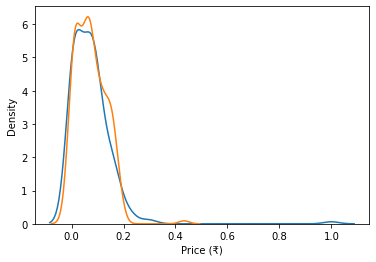

In [ ]:
yhat=linreg.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

#Decision Tree

In [ ]:
lar={}
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=45)
for i in range(1,500):
  
  reg=DecisionTreeRegressor(max_depth=i)
  reg.fit(Xtrain,Ytrain)
  sc=reg.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:
sorted(lar.items(),key=operator.itemgetter(1),reverse=True)[:3]

[(434, 83.5455638008524), (82, 83.54319776865097), (479, 83.54295415293826)]

In [ ]:
dectree=DecisionTreeRegressor(max_depth=478)
dectree.fit(Xtrain,Ytrain)
dectree.score(Xtest,Ytest)*100

82.74992516093236

#Random Forest

In [ ]:
lar={}
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=45)
for i in range(1,500):
  
  reg=RandomForestRegressor(n_estimators=i)
  reg.fit(Xtrain,Ytrain)
  sc=reg.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:
sorted(lar.items(),key=operator.itemgetter(1),reverse=True)[:3]

[(14, 92.40231275671681), (39, 92.01023482802691), (20, 91.85795953441044)]

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=45)

In [ ]:
ranfor=RandomForestRegressor(n_estimators=14)
ranfor.fit(Xtrain,Ytrain)
ranfor.score(Xtest,Ytest)*100

91.80014999649457

# why some highest value in loop is showing different results in model creation?
# so now how to decide best random state and max_depth(deicison tree) and n_estimators(random forest reg)?

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
data_matrix = xgb.DMatrix(data=X, label=y)
data_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tx,testx,ty,testy = train_test_split(X,y,random_state=0)

In [ ]:
testy

899     14999.0
984       949.0
1086    15499.0
494     13999.0
848     13999.0
         ...   
712      1149.0
265      6999.0
988      1299.0
101     16999.0
1081     1119.0
Name: Price (₹), Length: 278, dtype: float64

In [ ]:
xreg = xgb.XGBRegressor(learning_rate=.1, max_depth = 5, n_estimators=10)
xreg.fit(tx,ty)
ypred = xreg.predict(testx)
rmse = np.sqrt(mean_squared_error(testy, ypred))


[05:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse

10031.955111455673

In [ ]:

# all param will be in a dictionary
params = {
    'learning_rate':.1,
    'max_depth':5,
    'alpha':10,
}

In [ ]:

result = xgb.cv(dtrain= data_matrix,
                params= params,
                nfold = 3,
                num_boost_round=100,
                early_stopping_rounds=10,
                metrics='rmse',
                seed = 0 )

In [ ]:
result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,18140.451823,642.794761,18156.874023,1458.724793
1,16671.012695,618.078583,16784.605794,1462.185181
2,15352.507487,600.110021,15529.429362,1503.075859
3,14167.515951,579.294214,14449.450846,1511.951850
4,13106.444662,561.615826,13502.212240,1515.871756
...,...,...,...,...
95,2469.621745,383.394742,5751.038900,668.997304
96,2465.163127,382.418965,5750.239258,666.732882
97,2452.337158,374.943184,5752.171224,667.718790
98,2418.040120,397.349647,5731.954915,655.650892


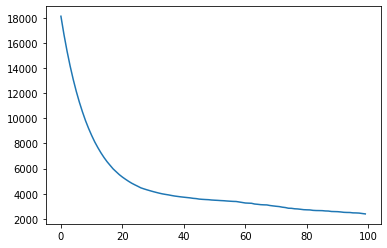

In [ ]:
result['train-rmse-mean'].plot()

In [ ]:
gridsearch_params = [ 
    (max_depth, min_child_weight,learning_rate)
    for max_depth in range(3,12)
    for min_child_weight in range(5,10)
    for learning_rate in np.arange(.1,1,.05)
]

In [ ]:

# initial parameter for variable
min_rmse = float('inf')
best_params = None

for max_depth,min_child_weight,lr in gridsearch_params:
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['learning_rate'] = lr
    result = xgb.cv(dtrain= data_matrix,
                    params= params,
                    nfold = 3,
                    num_boost_round=100,
                    early_stopping_rounds=10,
                    metrics='rmse', # rmse or mse or mae
                    seed = 0 )
    mean_rmse = result['test-rmse-mean'].min()
    boost_rounds = result['test-rmse-mean'].argmin()
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight,lr)

        
print(f'Best params: {best_params[0]},{best_params[1]},{best_params[2]} with rmse: {min_rmse}')


Best params: 6,5,0.3500000000000001 with rmse: 5649.0600583333335


In [ ]:
params['learning_rate'] = .35
params['max_depth'] = 6
params['alpha'] = 10
params['min_child_weight'] = 5
params

{'alpha': 10, 'learning_rate': 0.35, 'max_depth': 6, 'min_child_weight': 5}

In [ ]:
tx,testx,ty,testy = train_test_split(X,y,random_state=0)
dtrain = xgb.DMatrix(data=tx, label=ty)
dtest = xgb.DMatrix(data=testx, label=testy)


In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest,'Test')],
    early_stopping_rounds=10,
    verbose_eval=True,

)

[0]	Test-rmse:14610.1
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:11308.7
[2]	Test-rmse:9074.45
[3]	Test-rmse:7736.59
[4]	Test-rmse:6711.14
[5]	Test-rmse:6166.4
[6]	Test-rmse:5747.64
[7]	Test-rmse:5260.83
[8]	Test-rmse:4925.18
[9]	Test-rmse:4719.41
[10]	Test-rmse:4552.62
[11]	Test-rmse:4411.71
[12]	Test-rmse:4334.67
[13]	Test-rmse:4296.86
[14]	Test-rmse:4221.24
[15]	Test-rmse:4239.67
[16]	Test-rmse:4153.2
[17]	Test-rmse:4201.02
[18]	Test-rmse:4145.54
[19]	Test-rmse:4145.28
[20]	Test-rmse:4181.71
[21]	Test-rmse:4086.2
[22]	Test-rmse:4074.01
[23]	Test-rmse:4089.97
[24]	Test-rmse:4040.66
[25]	Test-rmse:4047.16
[26]	Test-rmse:4082.1
[27]	Test-rmse:4093.44
[28]	Test-rmse:4103.08
[29]	Test-rmse:4042.42
[30]	Test-rmse:4087.99
[31]	Test-rmse:4054.19
[32]	Test-rmse:4010.18
[33]	Test-rmse:4006.22
[34]	Test-rmse:4006.22
[35]	Test-rmse:4000.57
[36]	Test-rmse:4006.4
[37]	Test-rmse:3998.15
[38]	Test-rmse:3978.28
[39]	Test-rmse:4001.06
[40]	Test-rmse:4012.22
[41]	Test-rmse:

In [ ]:
num_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=[(dtest,'Test')]
)

[0]	Test-rmse:14610.1
[1]	Test-rmse:11308.7
[2]	Test-rmse:9074.45
[3]	Test-rmse:7736.59
[4]	Test-rmse:6711.14
[5]	Test-rmse:6166.4
[6]	Test-rmse:5747.64
[7]	Test-rmse:5260.83
[8]	Test-rmse:4925.18
[9]	Test-rmse:4719.41
[10]	Test-rmse:4552.62
[11]	Test-rmse:4411.71
[12]	Test-rmse:4334.67
[13]	Test-rmse:4296.86
[14]	Test-rmse:4221.24
[15]	Test-rmse:4239.67
[16]	Test-rmse:4153.2
[17]	Test-rmse:4201.02
[18]	Test-rmse:4145.54
[19]	Test-rmse:4145.28
[20]	Test-rmse:4181.71
[21]	Test-rmse:4086.2
[22]	Test-rmse:4074.01
[23]	Test-rmse:4089.97
[24]	Test-rmse:4040.66
[25]	Test-rmse:4047.16
[26]	Test-rmse:4082.1
[27]	Test-rmse:4093.44
[28]	Test-rmse:4103.08
[29]	Test-rmse:4042.42
[30]	Test-rmse:4087.99
[31]	Test-rmse:4054.19
[32]	Test-rmse:4010.18
[33]	Test-rmse:4006.22
[34]	Test-rmse:4006.22
[35]	Test-rmse:4000.57
[36]	Test-rmse:4006.4
[37]	Test-rmse:3998.15
[38]	Test-rmse:3978.28


In [ ]:
pred = best_model.predict(dtest)
np.sqrt(mean_squared_error(testy,pred))

3978.2799395882853

In [ ]:
best_model.save_model('mobile_pricing.model')

In [ ]:

loaded_model = xgb.Booster()
loaded_model.load_model('mobile_pricing.model')

In [ ]:
testx

array([[-0.45214279, -2.00510996,  0.80065674,  0.24733749,  0.1091728 ,
        -0.1280246 ],
       [-0.45214279,  0.45230215, -0.5727351 , -0.19256087, -0.00931676,
        -0.6714311 ],
       [-0.45214279,  0.45230215,  0.2513    , -0.41251006, -0.00931676,
        -0.1280246 ],
       ...,
       [-0.45214279,  0.45230215, -1.50664154, -1.0723576 , -0.00931676,
        -0.6714311 ],
       [-0.52360158,  0.74331147,  0.81164387,  0.24733749,  0.51203731,
         0.95878838],
       [-0.45214279,  0.45230215, -1.3967702 , -0.63245924, -0.00931676,
        -0.6714311 ]])

In [ ]:
test_d=pd.DataFrame(scaler.inverse_transform(testx))

In [ ]:
test_d['Prediction']=loaded_model.predict(dtest).reshape(-1,1)

In [ ]:
test_d['Original']=testy.reset_index().drop(['index'],axis=1)

In [ ]:
test_d

,0,1,2,3,4,5,Prediction,Original
0,11.0,16.0,5000.0,4.2,102.0,64.0,16203.015625,14999.0
1,11.0,92.0,2500.0,4.0,97.0,32.0,1128.967285,949.0
2,11.0,92.0,4000.0,3.9,97.0,64.0,14165.349609,15499.0
3,11.0,51.0,4300.0,4.4,104.0,64.0,12002.491211,13999.0
4,11.0,92.0,4000.0,4.1,97.0,64.0,14072.274414,13999.0
...,...,...,...,...,...,...,...,...
273,11.0,92.0,850.0,4.0,97.0,32.0,995.902283,1149.0
274,11.0,69.0,5000.0,4.4,33.0,32.0,7485.346680,6999.0
275,11.0,92.0,800.0,3.6,97.0,32.0,1026.022339,1299.0
276,10.0,101.0,5020.0,4.2,119.0,128.0,16518.154297,16999.0


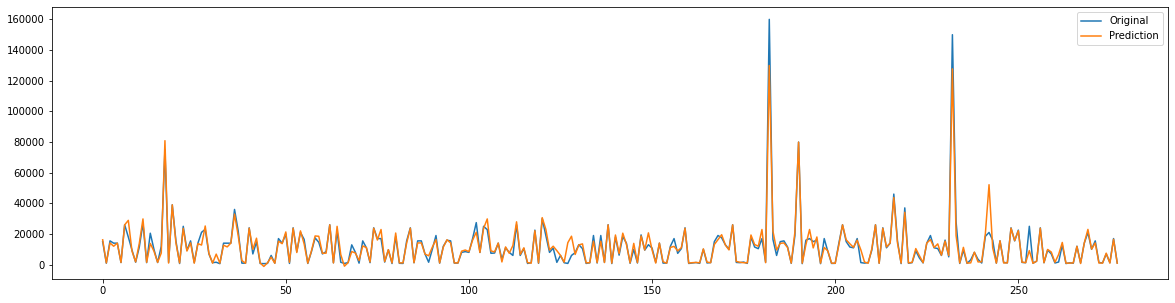

In [ ]:
test_d[['Original','Prediction']].plot(figsize=(20,5))

In [ ]:
preproccesors={'Scalers':scaler,
               'Label_os':label8,
               'labdel_proc_bran':label9,
               'ot_cam_features':label13
}



In [ ]:
import pickle

In [ ]:
with open('preproccesors.pk','wb') as file:
  pickle.dump(preproccesors,file)

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'0.22.2.post1'